In [2]:
# 时间戳
from datetime import datetime
now = datetime.now()
print(now)

2019-03-14 16:23:00.449595


In [3]:
from datetime import timedelta
start = datetime(2019,3,13)
start + timedelta(12)
start - 2*timedelta(12)

datetime.datetime(2019, 2, 17, 0, 0)

In [4]:
stamp = datetime(2019,3,13)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2019-03-13'

In [5]:
value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))

2011-01-03 00:00:00


In [6]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [7]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [8]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [9]:
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [10]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [11]:
import numpy as np
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.142750
2011-01-05    1.196408
2011-01-07    1.058620
2011-01-08    1.959166
2011-01-10    0.307668
2011-01-12    0.744012
dtype: float64

In [12]:
ts + ts[::6]

2011-01-02    0.2855
2011-01-05       NaN
2011-01-07       NaN
2011-01-08       NaN
2011-01-10       NaN
2011-01-12       NaN
dtype: float64

In [15]:
stamp = ts.index[2]
stamp
ts[stamp]

1.0586199297122754

In [16]:
ts.truncate(after='1/9/2011')

2011-01-02    0.142750
2011-01-05    1.196408
2011-01-07    1.058620
2011-01-08    1.959166
dtype: float64

In [19]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
index=dates,
columns=['Colorado', 'Texas',
'New York', 'Ohio'])
# 索引行
long_df.loc['5-2001']


,Colorado,Texas,New York,Ohio
2001-05-02,-0.195951,1.157874,-0.727251,2.406009
2001-05-09,1.439530,-0.633831,-0.627989,-0.180846
2001-05-16,-0.285168,1.322176,2.817234,1.796675
2001-05-23,0.962626,0.671213,-1.060391,0.037362
2001-05-30,-1.093473,0.680360,-0.860704,-1.925026


In [21]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000',
'1/2/2000','1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts['1/3/2000']

4

In [22]:
dup_ts.index.is_unique

False

In [23]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [27]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [28]:
ts

2011-01-02    0.142750
2011-01-05    1.196408
2011-01-07    1.058620
2011-01-08    1.959166
2011-01-10    0.307668
2011-01-12    0.744012
dtype: float64

In [31]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [32]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4,
freq='M'))
ts

2000-01-31    0.507227
2000-02-29    0.851974
2000-03-31    0.737350
2000-04-30   -0.418576
Freq: M, dtype: float64

In [33]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.507227
2000-04-30    0.851974
Freq: M, dtype: float64

In [34]:
ts.shift(2, freq='M')

2000-03-31    0.507227
2000-04-30    0.851974
2000-05-31    0.737350
2000-06-30   -0.418576
Freq: M, dtype: float64

In [35]:
ts.shift(3, freq='D')

2000-02-03    0.507227
2000-03-03    0.851974
2000-04-03    0.737350
2000-05-03   -0.418576
dtype: float64

In [36]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [37]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [39]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [40]:
ts = pd.Series(np.random.randn(20),
index=pd.date_range('1/15/2000', periods=20,
freq='4d'))
ts

2000-01-15   -1.215211
2000-01-19   -0.988728
2000-01-23   -1.140970
2000-01-27   -0.026143
2000-01-31    0.077024
2000-02-04    1.585490
2000-02-08   -0.270959
2000-02-12    1.208494
2000-02-16    0.232356
2000-02-20    1.827483
2000-02-24    1.033557
2000-02-28   -0.360871
2000-03-03   -1.728140
2000-03-07   -0.387895
2000-03-11    0.197374
2000-03-15   -2.745426
2000-03-19   -0.922491
2000-03-23   -0.378077
2000-03-27   -0.885342
2000-03-31   -0.571386
Freq: 4D, dtype: float64

In [41]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.658806
2000-02-29    0.750793
2000-03-31   -0.927673
dtype: float64

In [42]:
ts.resample('M').mean()

2000-01-31   -0.658806
2000-02-29    0.750793
2000-03-31   -0.927673
Freq: M, dtype: float64

In [44]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    1.629830
2000-01-02    0.945258
2000-01-03   -1.001815
2000-01-04   -0.430095
2000-01-05    0.143318
2000-01-06   -0.706523
2000-01-07    0.823346
2000-01-08   -0.647604
2000-01-09    0.452096
2000-01-10    0.202441
2000-01-11   -1.072294
2000-01-12   -0.718413
2000-01-13   -1.078805
2000-01-14    0.871705
2000-01-15    0.605827
2000-01-16    0.107620
2000-01-17    1.421879
2000-01-18   -0.123413
2000-01-19   -1.451632
2000-01-20    0.356677
2000-01-21   -0.861516
2000-01-22   -0.102811
2000-01-23   -0.837101
2000-01-24    0.863704
2000-01-25    0.945538
2000-01-26   -0.673470
2000-01-27    1.084039
2000-01-28   -1.526975
2000-01-29    0.000721
2000-01-30   -1.371869
                ...   
2000-03-11    0.210982
2000-03-12   -1.211145
2000-03-13   -0.898577
2000-03-14   -1.030719
2000-03-15    0.130548
2000-03-16   -0.841914
2000-03-17    0.826168
2000-03-18   -0.701260
2000-03-19    0.230246
2000-03-20    2.627825
2000-03-21   -1.272585
2000-03-22    1.405295
2000-03-23 

In [45]:
ts.resample('M', kind='period').mean()

2000-01   -0.063193
2000-02    0.342835
2000-03    0.047346
2000-04    0.195729
Freq: M, dtype: float64

In [48]:
rng = pd.date_range('2000-01-01',periods=12,freq='T')
ts = pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [49]:
ts.resample('5min', closed='right').sum()


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [50]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [51]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [52]:
frame = pd.DataFrame(np.random.randn(2, 4),index=pd.date_range('1/1/2000',
periods=2,freq='W-WED'),columns=['Colorado', 'Texas', 'NewYork', 'Ohio'])

frame

,Colorado,Texas,NewYork,Ohio
2000-01-05,0.337981,-0.197439,0.762756,-1.311237
2000-01-12,0.390138,1.673988,0.522696,0.613043


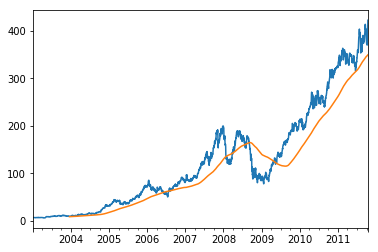

In [57]:
import matplotlib.pyplot as plt
close_px_all = pd.read_csv('E:/jupyter-notebook/pydata-book-2nd-edition/examples/stock_px_2.csv',parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
plt.show()

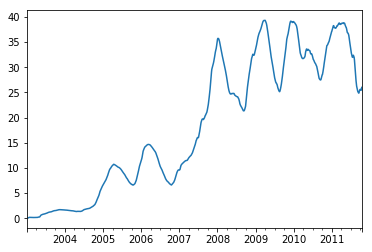

In [59]:
appl_std250 = close_px.AAPL.rolling(250,
min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

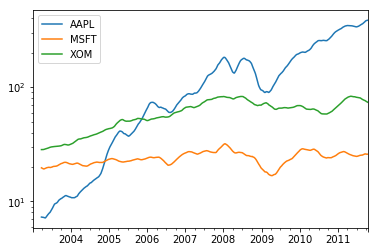

In [62]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

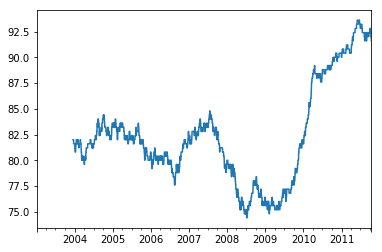

In [66]:
from scipy.stats import percentileofscore
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125,
min_periods=100).corr(spx_rets)
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)

result.plot()